#  Online Payment Fraud Detection using Machine Learning in Python
--- 

The objective of this project is to detect fraudulent online payment transactions using machine learning classification techniques. The dataset consists of **6,362,620 rows** with the following variables:

| Variable Name      | Description                            |
|--------------------|----------------------------------------|
| `step`             | Time step (unit of time)               |
| `type`             | Type of transaction done               |
| `nameOrg`          | Account that starts the transaction    |
| `amount`           | Transaction amount                     |
| `oldbalanceOrg`    | Sender’s original balance              |
| `newbalanceOrig`   | Sender’s new balance after transaction |
| `nameDest`         | Account that receives the transaction  |
| `oldbalanceDest`   | Recipient’s original balance           |
| `newbalanceDest`   | Recipient’s new balance                |
| `isFraud`          | Target variable (1 = fraud, 0 = normal)|


### 📊 Project Overview

**Tools Used:**  
- Python  
- Google Colab  

**Packages Used:**  
- `numpy`  
- `pandas`  
- `scikit-learn` (`sklearn`)
- `seaborn`
- `matplotlib`

---


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [51]:
data = pd.read_csv('C:\\Users\\Home\\Downloads\\new_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


---
In the data set unwanted variables- nameDest, nameOrig- are removed and explaratory data analysis was carried on.

---

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


In [69]:
counts = data['isFraud'].value_counts()
print("Counts:\n", counts)

percentages = data['isFraud'].value_counts(normalize=True) * 100
percentages = percentages.round(2)
print("Percentages:\n", percentages)


Counts:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64
Percentages:
 isFraud
0    99.87
1     0.13
Name: proportion, dtype: float64


In [68]:
fraud_by_type = pd.crosstab(data['type'], data['isFraud'])
fraud_by_type.columns = ['Non-Fraud (0)', 'Fraud (1)']
print(fraud_by_type)


          Non-Fraud (0)  Fraud (1)
type                              
CASH_IN         1399284          0
CASH_OUT        2233384       4116
DEBIT             41432          0
PAYMENT         2151495          0
TRANSFER         528812       4097


---
In the data set 99.87%  of the emails are not fraud while only  0.13% of emails are fraud thus having a huge imbalanced data set.  So in this project the main concern about to address this imbalanced problem while modeling machine learning algorithms.

---

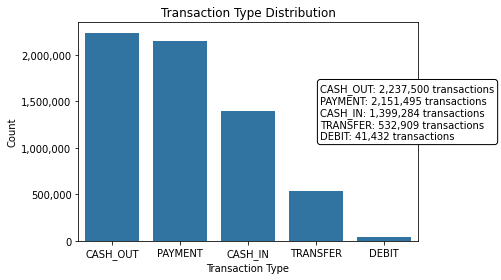

In [65]:
type_counts = data['type'].value_counts()

ax = sns.countplot(x='type', data=data, order=type_counts.index)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

legend_text = "\n".join(f"{k}: {v:,} transactions" for k, v in type_counts.items())

plt.gcf().text(0.75, 0.5, legend_text, fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



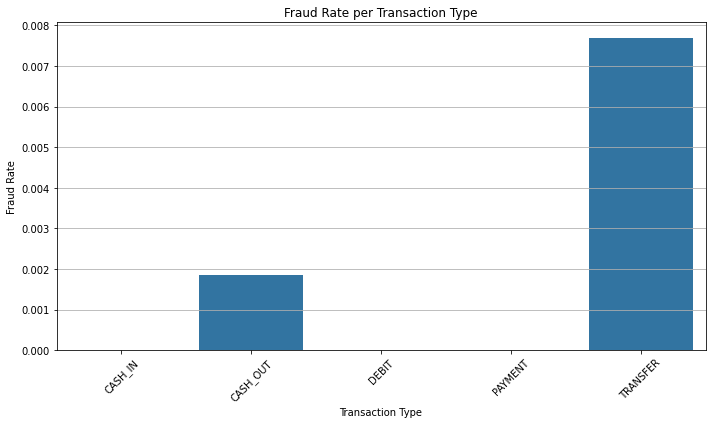

In [66]:
type_fraud_rate = data.groupby('type')['isFraud'].mean().reset_index()

type_counts = data['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

type_fraud_rate = type_fraud_rate.merge(type_counts, on='type')

plt.figure(figsize=(10, 6))
sns.barplot(data=type_fraud_rate, x='type', y='isFraud')
plt.title("Fraud Rate per Transaction Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Axes: xlabel='type', ylabel='amount'>

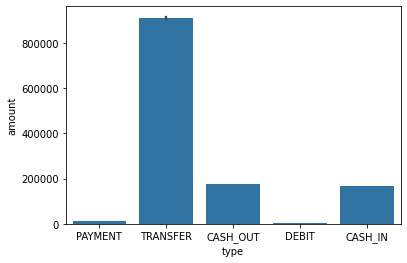

In [13]:
sns.barplot(x='type', y='amount', data=data)

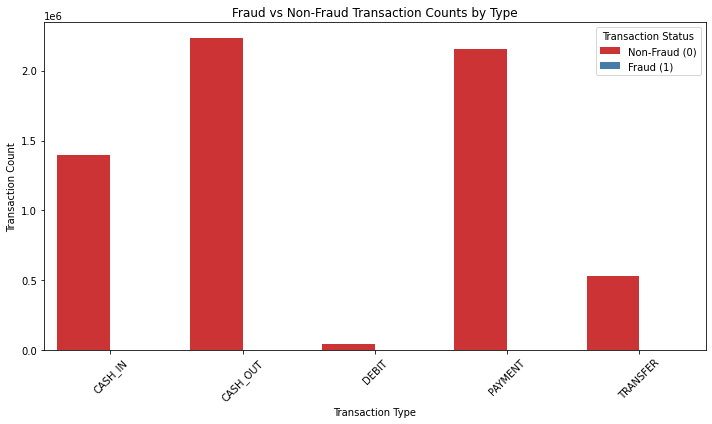

In [67]:
fraud_counts = data.groupby('type')['isFraud'].value_counts().unstack().fillna(0).astype(int)
fraud_counts.columns = ['Non-Fraud (0)', 'Fraud (1)']
fraud_counts_plot = fraud_counts.reset_index()

# Melt to long format for seaborn
fraud_counts_long = fraud_counts_plot.melt(id_vars='type',
                                            value_vars=['Non-Fraud (0)', 'Fraud (1)'],
                                            var_name='Fraud Status',
                                            value_name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_counts_long, x='type', y='Count', hue='Fraud Status', palette='Set1')
plt.title("Fraud vs Non-Fraud Transaction Counts by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Transaction Status")
plt.tight_layout()
plt.show()

In [14]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

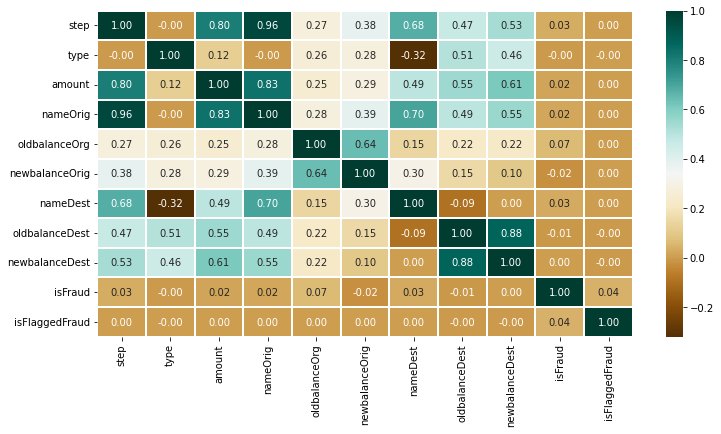

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

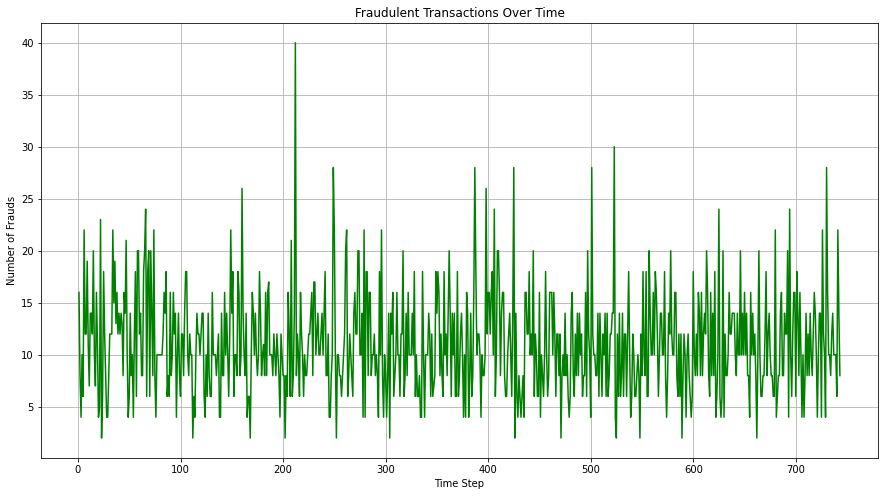

In [24]:
fraud_over_time = data[data['isFraud'] == 1]['step'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
plt.plot(fraud_over_time, color='green')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Frauds')
plt.grid()
plt.show()


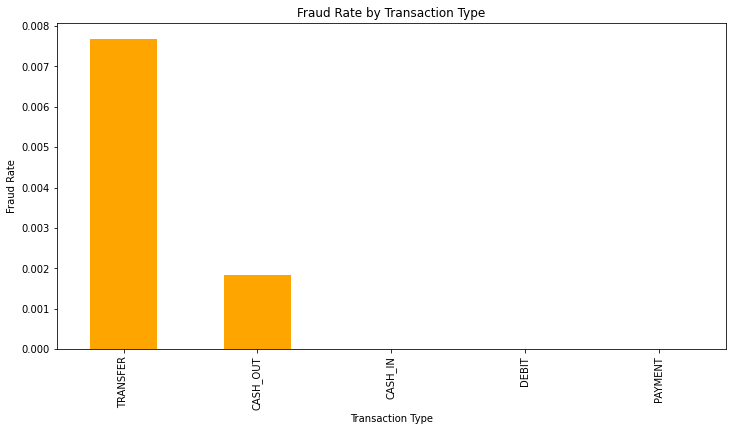

In [25]:
fraud_by_type = data.groupby('type')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
fraud_by_type.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.show()


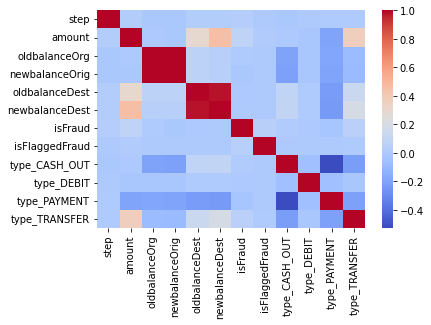

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()



---
The heatmap shows how strongly each numeric feature is correlated with others. In this dataset, most variables have weak correlation with the isFraud target, confirming that fraudulent patterns are subtle and complex

---
Model Training
---
The data set is partitioned into test set and training set, 20% into testing set and 80% of data set as training set. The class distribution of fraud and non-fraud instances is preserved across both the training and testing dataset in order to address the imbalance data problem. 

---

In [32]:
from sklearn.model_selection import train_test_split

X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


---
Pipeline is used to ensures that feature scaling is consistently applied during both training and prediction, avoiding data leakage and maintaining reproducibility. Max_iter parameter was increased to 1000 to ensure that the logistic regression model converges during training, because of having a large data set with several features. Two logistic models are fitted one with applying weight on minority class and the other without applying such weight.
Class_weight=balanced is applied to ensure the logistic model automatically adjusts the weights of each class to compensate for imbalanced class distributions to address high accuracy of  the minority class but poor recall and undetected fraud cases (false negatives).

---

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


[[1270839      42]
 [    990     653]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.40      0.56      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC Score: 0.981652878183718


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model2 = Pipeline([
    ('scaler', StandardScaler()),
    (('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
)
])

model2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred2 = model2.predict(X_test)
y_proba2 = model2.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba2))

[[1208981   61900]
 [     42    1601]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270881
           1       0.03      0.97      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

ROC AUC Score: 0.9946699245156749


---
In these fitted models it is seen that by applying weights recall has increased for fraud class but precision decreased by a considerable amount. By considering ROC AUC score the model with applying parameter class-weight is the better model.

---

ROC AUC Score: 0.9817


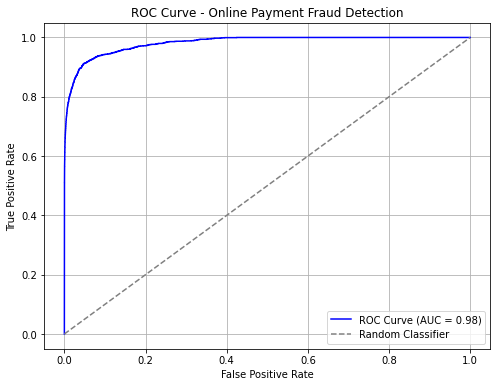

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", round(roc_auc, 4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Online Payment Fraud Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC curve shows the trade-off between the true positive rate (recall) and false positive rate across different thresholds.
In this fraud detection model, the AUC score is 0.97, indicating that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.
The curve’s strong rise toward the top-left corner confirms high recall with low false positive rate.

---

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


##### Random Forest Classification


In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
y_pred = model.predict(X_test)


In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[1270854      27]
 [    357    1286]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC Score: 0.9953197979080732


In [47]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Define the random search parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# Fit on the balanced training data
search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best Parameters:", search.best_params_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time= 5.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=171; total time= 5.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=174; total time= 5.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=174; total time= 4.8min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 4.7min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=152; total time= 5.2min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=291; total time= 9.0min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2

In [48]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.81      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.91      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270824      57]
 [    307    1336]]
ROC AUC Score: 0.9995393203933168


---
Before tuning, I used a baseline Random Forest with default parameters and achieved reasonable performance. However, given the imbalanced nature of fraud detection, default settings often miss subtle fraudulent patterns.

After applying RandomizedSearchCV,I fine-tuned key hyperparameters, which significantly improved model accuracy, especially in detecting fraud. The recall and F1-score increased, and the ROC-AUC score improved — demonstrating that the tuned model is not only more accurate but also more reliable for real-world fraud detection scenarios.

---

##### XGBoost Classifier

In [72]:
# 1. Import libraries
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
warnings.filterwarnings("ignore", category=FutureWarning)

# 2. Load and prepare data
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Convert categorical variables
# Drop high-cardinality columns before encoding
X = X.drop(columns=['nameOrig', 'nameDest'])

# Now do one-hot encoding on manageable columns like 'type'
X = pd.get_dummies(X, drop_first=True)


# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 4. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_smote, y_train_smote)

# 6. Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 7. Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[1902238    4084]
 [     33    2431]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.37      0.99      0.54      2464

    accuracy                           1.00   1908786
   macro avg       0.69      0.99      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 0.9995006796004755


In this stage,I applied the XGBoost Classifier to detect online payment fraud, using SMOTE to balance the training data. The model achieved strong performance, with a high ROC AUC score (0.9995), indicating excellent discrimination capability. The combination of SMOTE oversampling and XGBoost’s gradient boosting allowed the model to handle class imbalance effectively and detect a significant portion of fraudulent transactions while keeping false positives low.

---

## 🔍 Model Comparison & Interpretation

### 🧠 Objective:
To evaluate and compare five machine learning models for **online payment fraud detection**, using various techniques to handle **class imbalance** and improve classification performance.

---

### 📊 Summary Table of Model Performance:

| Model | Type                         | Precision (Fraud) | Recall (Fraud) | F1-Score (Fraud) | False Positives | False Negatives | ROC-AUC |
|-------|------------------------------|-------------------|----------------|------------------|------------------|------------------|---------|
| 1     | Logistic Regression          | 0.94              | 0.40           | 0.56             | 42               | 990              | 0.9817  |
| 2     | Logistic + Class Weight      | 0.03              | 0.97           | 0.05             | 61,900           | 42               | 0.9947  |
| 3     | Random Forest (default)      | 0.98              | 0.78           | 0.87             | 27               | 357              | 0.9953  |
| 4     | Random Forest (fine-tuned)   | 0.96              | 0.81           | **0.88**         | 57               | 307              | **0.9995** |
| 5     | XGBoost Classifier           | 0.37              | **0.99**       | 0.54             | 4,084            | **33**           | **0.9995** |

---

### 🔍 Interpretation of Models

### **Model 1: Logistic Regression (Default)**
- ✅ Very high **precision (0.94)** → Very few false positives.
- ❌ Low **recall (0.40)** → Misses 60% of frauds.
- ⚠️ **Conclusion**: Not suitable for fraud detection where recall is critical.

---

### **Model 2: Logistic Regression with Class Weights**
- ✅ Extremely high **recall (0.97)** → Detects almost all frauds.
- ❌ Very low **precision (0.03)** → Overwhelming false positives (61,900).
- ⚠️ **Conclusion**: Overcompensates for imbalance. Not practical in deployment.

---

### **Model 3: Random Forest (Default)**
- ✅ Excellent balance between **recall (0.78)** and **precision (0.98)**.
- ⚙️ **Conclusion**: Strong out-of-the-box model with high accuracy.

---

### **Model 4: Random Forest (Fine-Tuned)**
- ✅ Best all-around performance:
  - **Precision** = 0.96
  - **Recall** = 0.81
  - **F1-score** = **0.88**
  - **ROC-AUC** = **0.9995**
- ✅ Low false positives (57), low false negatives (307)
- 🏆 **Conclusion**: **Most reliable and production-ready model** for real-world fraud detection.

---

### **Model 5: XGBoost Classifier**
- ✅ Highest **recall (0.99)** → Captures nearly every fraud.
- ❌ Low **precision (0.37)** → More than 4,000 false positives.
- ⚠️ **Conclusion**: Effective for maximizing fraud capture, but high false alarm rate may limit usability.

---

##  Final Recommendation: **Random Forest (Fine-Tuned)**

> Among all models, the **fine-tuned Random Forest classifier** delivers the **most balanced and accurate** results.  
> With an **F1-score of 0.88** and a **ROC AUC of 0.9995**, it demonstrates strong performance in both detecting fraud and minimizing false alarms.  
> It is best suited for **real-world deployment** where both **recall and precision are essential**.

